HEAVISIDE STEP FUNCTION DEMONSTRATION
Heaviside function visualization saved as 'heaviside_function.png'

XOR PROBLEM WITH HEAVISIDE MLP

XOR Truth Table:
----------------------------------------
Input A | Input B | Expected Output
----------------------------------------
   0    |    0    |        0
   0    |    1    |        1
   1    |    0    |        1
   1    |    1    |        0
----------------------------------------

Network Architecture:
----------------------------------------
Input Layer: 2 neurons
Hidden Layer: 2 perceptrons with Heaviside activation
  - Perceptron 1: NAND gate
  - Perceptron 2: OR gate
Output Layer: 1 perceptron with Heaviside activation
  - Implements: AND gate

Network Weights:
----------------------------------------
Hidden Layer Perceptron 1 (NAND):
  Weights: [[-30  20  20]]
  Function: Heaviside(-30 + 20*x1 + 20*x2)

Hidden Layer Perceptron 2 (OR):
  Weights: [[-10  20  20]]
  Function: Heaviside(-10 + 20*x1 + 20*x2)

Output Layer (AND):
  Weights:

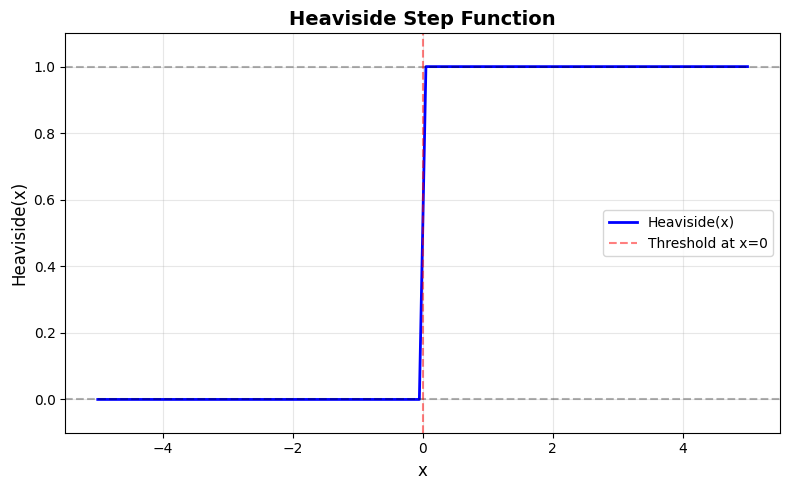

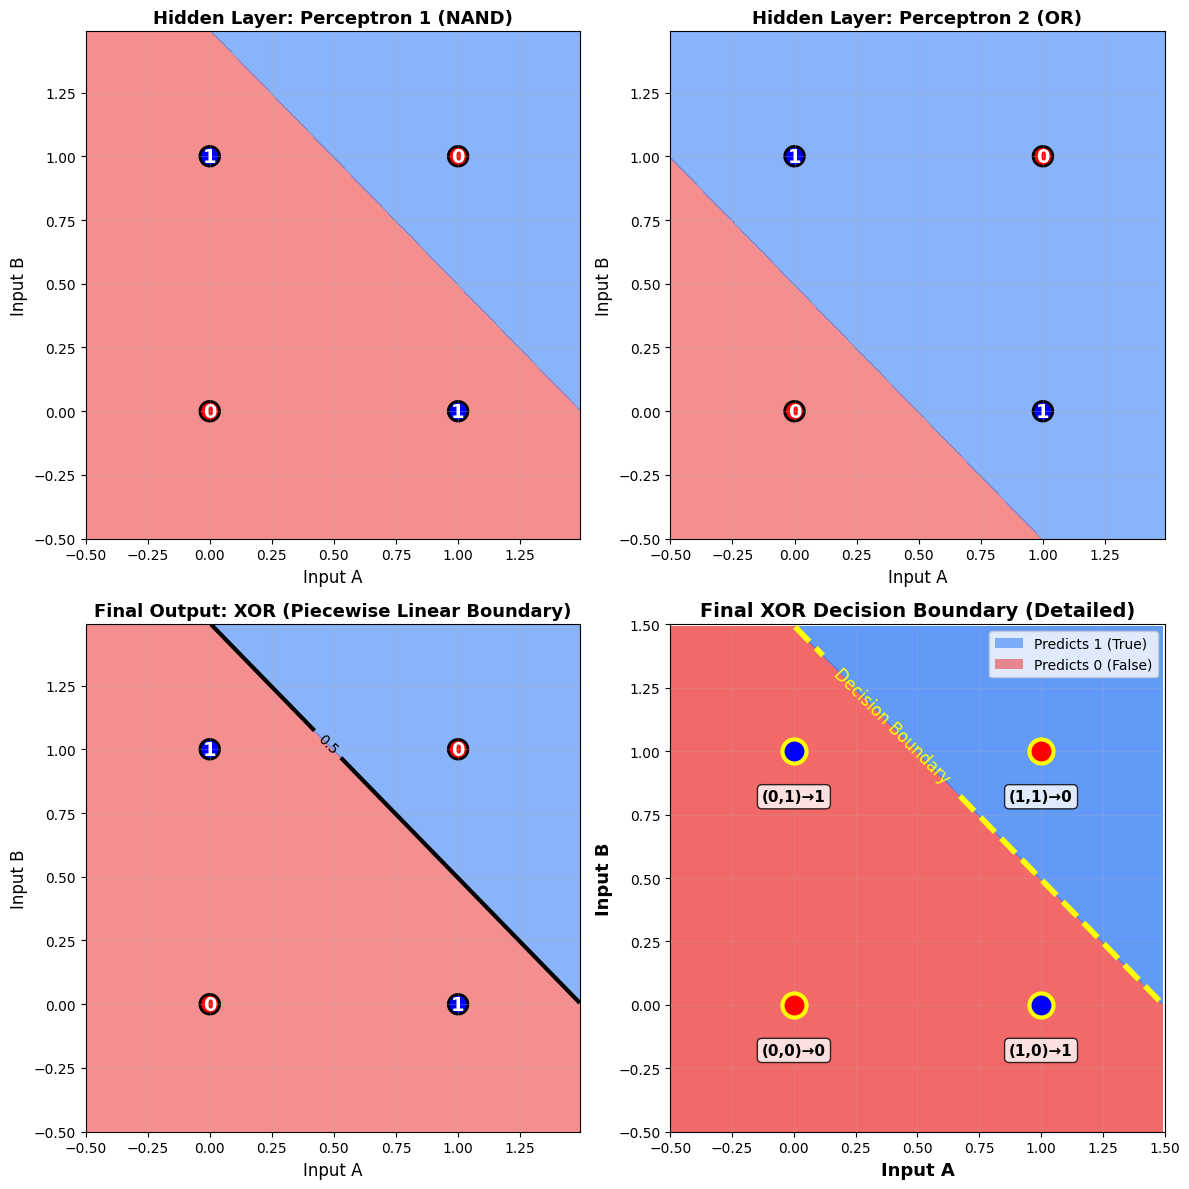

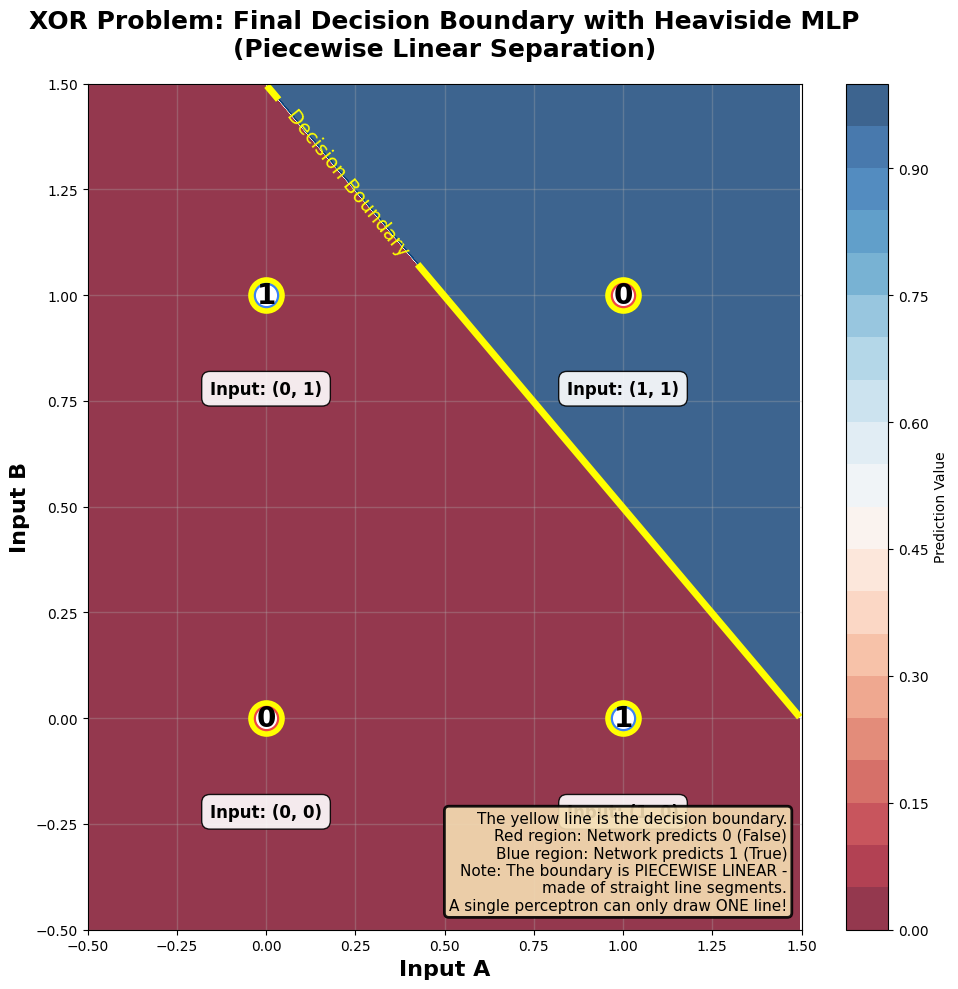

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Heaviside step function (activation function)
def heaviside(x):
    """
    Heaviside step function: returns 1 if x >= 0, else 0
    """
    return np.where(x >= 0, 1, 0)

class PerceptronMLP:
    """
    Multi-Layer Perceptron with Heaviside activation functions
    Manually designed to solve XOR
    """
    def __init__(self):
        # Hidden layer weights (2 perceptrons)
        # Perceptron 1: Implements NAND
        self.W1 = np.array([
            [-30, 20, 20]  # bias, weight for x1, weight for x2
        ])
        
        # Perceptron 2: Implements OR
        self.W2 = np.array([
            [-10, 20, 20]  # bias, weight for x1, weight for x2
        ])
        
        # Output layer weights (1 perceptron)
        # Implements AND on hidden layer outputs
        self.W_out = np.array([
            [-30, 20, 20]  # bias, weight for h1, weight for h2
        ])
    
    def forward(self, X, verbose=False):
        """
        Forward pass through the network
        X: input array of shape (n_samples, 2)
        Returns: output predictions
        """
        # Add bias term (column of 1s) to input
        X_bias = np.c_[np.ones(X.shape[0]), X]
        
        # Hidden layer computation
        z1 = np.dot(X_bias, self.W1.T)  # Linear combination for perceptron 1
        h1 = heaviside(z1)               # Apply Heaviside function
        
        z2 = np.dot(X_bias, self.W2.T)  # Linear combination for perceptron 2
        h2 = heaviside(z2)               # Apply Heaviside function
        
        if verbose:
            print("Hidden Layer Outputs:")
            print(f"  z1 (before activation): {z1.flatten()}")
            print(f"  h1 (NAND): {h1.flatten()}")
            print(f"  z2 (before activation): {z2.flatten()}")
            print(f"  h2 (OR): {h2.flatten()}")
            print()
        
        # Combine hidden layer outputs
        hidden_output = np.c_[h1, h2]
        hidden_bias = np.c_[np.ones(hidden_output.shape[0]), hidden_output]
        
        # Output layer computation
        z_out = np.dot(hidden_bias, self.W_out.T)
        output = heaviside(z_out)
        
        if verbose:
            print("Output Layer:")
            print(f"  z_out (before activation): {z_out.flatten()}")
            print(f"  output (XOR): {output.flatten()}")
            print()
        
        return output, h1, h2
    
    def visualize_decision_boundary(self, X, y):
        """
        Visualize the decision boundaries for each layer
        """
        # Create mesh grid
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        h = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Predict for each point in mesh
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z, Z1, Z2 = self.forward(grid_points)
        Z = Z.reshape(xx.shape)
        Z1 = Z1.reshape(xx.shape)
        Z2 = Z2.reshape(xx.shape)
        
        # Create subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        
        # Plot Perceptron 1 (NAND)
        axes[0, 0].contourf(xx, yy, Z1, levels=[0, 0.5, 1], colors=['#ef4444', '#3b82f6'], alpha=0.6)
        axes[0, 0].scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in y], 
                       s=200, edgecolors='black', linewidths=2)
        for i in range(len(X)):
            axes[0, 0].annotate(f'{int(y[i])}', (X[i, 0], X[i, 1]), 
                           fontsize=14, ha='center', va='center', color='white', weight='bold')
        axes[0, 0].set_xlabel('Input A', fontsize=12)
        axes[0, 0].set_ylabel('Input B', fontsize=12)
        axes[0, 0].set_title('Hidden Layer: Perceptron 1 (NAND)', fontsize=13, weight='bold')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Plot Perceptron 2 (OR)
        axes[0, 1].contourf(xx, yy, Z2, levels=[0, 0.5, 1], colors=['#ef4444', '#3b82f6'], alpha=0.6)
        axes[0, 1].scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in y], 
                       s=200, edgecolors='black', linewidths=2)
        for i in range(len(X)):
            axes[0, 1].annotate(f'{int(y[i])}', (X[i, 0], X[i, 1]), 
                           fontsize=14, ha='center', va='center', color='white', weight='bold')
        axes[0, 1].set_xlabel('Input A', fontsize=12)
        axes[0, 1].set_ylabel('Input B', fontsize=12)
        axes[0, 1].set_title('Hidden Layer: Perceptron 2 (OR)', fontsize=13, weight='bold')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Plot Output (XOR) - Large version
        axes[1, 0].contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#ef4444', '#3b82f6'], alpha=0.6)
        axes[1, 0].scatter(X[:, 0], X[:, 1], c=['red' if label == 0 else 'blue' for label in y], 
                       s=200, edgecolors='black', linewidths=2)
        for i in range(len(X)):
            axes[1, 0].annotate(f'{int(y[i])}', (X[i, 0], X[i, 1]), 
                           fontsize=14, ha='center', va='center', color='white', weight='bold')
        
        # Draw the decision boundaries more clearly
        contour = axes[1, 0].contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3)
        axes[1, 0].clabel(contour, inline=True, fontsize=10)
        
        axes[1, 0].set_xlabel('Input A', fontsize=12)
        axes[1, 0].set_ylabel('Input B', fontsize=12)
        axes[1, 0].set_title('Final Output: XOR (Piecewise Linear Boundary)', fontsize=13, weight='bold')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Additional large final decision boundary plot
        axes[1, 1].contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#ef4444', '#3b82f6'], alpha=0.8)
        
        # Draw decision boundary with thick line
        contour = axes[1, 1].contour(xx, yy, Z, levels=[0.5], colors='yellow', linewidths=4, linestyles='dashed')
        axes[1, 1].clabel(contour, inline=True, fontsize=12, fmt='Decision Boundary')
        
        # Plot points with labels
        for i in range(len(X)):
            color = 'blue' if y[i] == 1 else 'red'
            axes[1, 1].scatter(X[i, 0], X[i, 1], c=color, s=300, edgecolors='yellow', linewidths=3, zorder=5)
            axes[1, 1].annotate(f'({X[i, 0]},{X[i, 1]})→{int(y[i])}', 
                           (X[i, 0], X[i, 1] - 0.15), 
                           fontsize=11, ha='center', va='top', 
                           bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                           weight='bold')
        
        axes[1, 1].set_xlabel('Input A', fontsize=13, weight='bold')
        axes[1, 1].set_ylabel('Input B', fontsize=13, weight='bold')
        axes[1, 1].set_title('Final XOR Decision Boundary (Detailed)', fontsize=14, weight='bold')
        axes[1, 1].grid(True, alpha=0.3, linewidth=0.5)
        axes[1, 1].set_xlim(x_min, x_max)
        axes[1, 1].set_ylim(y_min, y_max)
        
        # Add legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='#3b82f6', alpha=0.6, label='Predicts 1 (True)'),
            Patch(facecolor='#ef4444', alpha=0.6, label='Predicts 0 (False)'),
        ]
        axes[1, 1].legend(handles=legend_elements, loc='upper right', fontsize=10)
        
        plt.tight_layout()
        plt.savefig('xor_heaviside_mlp.png', dpi=150, bbox_inches='tight')
        print("Decision boundary visualization saved as 'xor_heaviside_mlp.png'\n")
        
    def visualize_final_boundary_only(self, X, y):
        """
        Create a focused visualization of just the final XOR decision boundary
        """
        # Create mesh grid
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        h = 0.005  # Higher resolution for smoother boundary
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # Predict for each point in mesh
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z, _, _ = self.forward(grid_points)
        Z = Z.reshape(xx.shape)
        
        # Create figure
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        # Plot decision regions with gradient
        contourf = ax.contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.8)
        plt.colorbar(contourf, ax=ax, label='Prediction Value')
        
        # Draw the exact decision boundary
        contour = ax.contour(xx, yy, Z, levels=[0.5], colors='yellow', linewidths=5, linestyles='solid')
        ax.clabel(contour, inline=True, fontsize=14, fmt='Decision Boundary', colors='yellow')
        
        # Plot the XOR points with detailed annotations
        for i in range(len(X)):
            color = 'blue' if y[i] == 1 else 'red'
            marker_color = '#3b82f6' if y[i] == 1 else '#ef4444'
            
            # Large marker
            ax.scatter(X[i, 0], X[i, 1], c=marker_color, s=500, 
                      edgecolors='yellow', linewidths=4, zorder=5, marker='o')
            
            # Inner white circle for the number
            ax.scatter(X[i, 0], X[i, 1], c='white', s=200, zorder=6)
            
            # Number label
            ax.text(X[i, 0], X[i, 1], f'{int(y[i])}', 
                   fontsize=20, ha='center', va='center', 
                   color='black', weight='bold', zorder=7)
            
            # Input coordinate label
            ax.annotate(f'Input: ({X[i, 0]}, {X[i, 1]})', 
                       (X[i, 0], X[i, 1] - 0.2), 
                       fontsize=12, ha='center', va='top',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                                edgecolor='black', alpha=0.9),
                       weight='bold')
        
        ax.set_xlabel('Input A', fontsize=16, weight='bold')
        ax.set_ylabel('Input B', fontsize=16, weight='bold')
        ax.set_title('XOR Problem: Final Decision Boundary with Heaviside MLP\n(Piecewise Linear Separation)', 
                    fontsize=18, weight='bold', pad=20)
        ax.grid(True, alpha=0.3, linewidth=1)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        # Add text box explaining the boundary
        textstr = 'The yellow line is the decision boundary.\n'
        textstr += 'Red region: Network predicts 0 (False)\n'
        textstr += 'Blue region: Network predicts 1 (True)\n'
        textstr += 'Note: The boundary is PIECEWISE LINEAR -\n'
        textstr += 'made of straight line segments.\n'
        textstr += 'A single perceptron can only draw ONE line!'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.9, edgecolor='black', linewidth=2)
        ax.text(0.98, 0.02, textstr, transform=ax.transAxes, fontsize=11,
                verticalalignment='bottom', horizontalalignment='right', bbox=props)
        
        plt.tight_layout()
        plt.savefig('xor_final_boundary.png', dpi=200, bbox_inches='tight')
        print("Final decision boundary visualization saved as 'xor_final_boundary.png'\n")

def demonstrate_heaviside():
    """
    Demonstrate the Heaviside function
    """
    print("="*60)
    print("HEAVISIDE STEP FUNCTION DEMONSTRATION")
    print("="*60)
    
    x = np.linspace(-5, 5, 100)
    y = heaviside(x)
    
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', linewidth=2, label='Heaviside(x)')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axhline(y=1, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Threshold at x=0')
    plt.grid(True, alpha=0.3)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Heaviside(x)', fontsize=12)
    plt.title('Heaviside Step Function', fontsize=14, weight='bold')
    plt.legend()
    plt.ylim(-0.1, 1.1)
    plt.tight_layout()
    plt.savefig('heaviside_function.png', dpi=150)
    print("Heaviside function visualization saved as 'heaviside_function.png'\n")

def main():
    # Demonstrate Heaviside function
    demonstrate_heaviside()
    
    print("="*60)
    print("XOR PROBLEM WITH HEAVISIDE MLP")
    print("="*60)
    print()
    
    # XOR dataset
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 1, 1, 0])
    
    print("XOR Truth Table:")
    print("-" * 40)
    print("Input A | Input B | Expected Output")
    print("-" * 40)
    for i in range(len(X)):
        print(f"   {X[i, 0]}    |    {X[i, 1]}    |        {y[i]}")
    print("-" * 40)
    print()
    
    # Create and test the MLP
    mlp = PerceptronMLP()
    
    print("Network Architecture:")
    print("-" * 40)
    print("Input Layer: 2 neurons")
    print("Hidden Layer: 2 perceptrons with Heaviside activation")
    print("  - Perceptron 1: NAND gate")
    print("  - Perceptron 2: OR gate")
    print("Output Layer: 1 perceptron with Heaviside activation")
    print("  - Implements: AND gate")
    print()
    
    print("Network Weights:")
    print("-" * 40)
    print("Hidden Layer Perceptron 1 (NAND):")
    print(f"  Weights: {mlp.W1}")
    print(f"  Function: Heaviside(-30 + 20*x1 + 20*x2)")
    print()
    print("Hidden Layer Perceptron 2 (OR):")
    print(f"  Weights: {mlp.W2}")
    print(f"  Function: Heaviside(-10 + 20*x1 + 20*x2)")
    print()
    print("Output Layer (AND):")
    print(f"  Weights: {mlp.W_out}")
    print(f"  Function: Heaviside(-30 + 20*h1 + 20*h2)")
    print()
    
    # Forward pass with verbose output
    print("="*60)
    print("DETAILED FORWARD PASS")
    print("="*60)
    predictions, h1, h2 = mlp.forward(X, verbose=True)
    
    # Display results
    print("="*60)
    print("FINAL RESULTS")
    print("="*60)
    print("Input A | Input B | H1(NAND) | H2(OR) | Output | Expected | Correct?")
    print("-" * 70)
    for i in range(len(X)):
        correct = "✓" if predictions[i, 0] == y[i] else "✗"
        print(f"   {X[i, 0]}    |    {X[i, 1]}    |     {int(h1[i, 0])}    |   {int(h2[i, 0])}    |   {int(predictions[i, 0])}    |    {y[i]}     |    {correct}")
    print("-" * 70)
    print()
    
    # Calculate accuracy
    accuracy = np.mean(predictions.flatten() == y)
    print(f"Accuracy: {accuracy * 100:.1f}%")
    print()
    
    # Visualize decision boundaries
    mlp.visualize_decision_boundary(X, y)
    mlp.visualize_final_boundary_only(X, y)
    
    print("="*60)
    print("KEY INSIGHT")
    print("="*60)
    print("XOR = (A NAND B) AND (A OR B)")
    print()
    print("The Heaviside function creates PIECEWISE LINEAR boundaries.")
    print("Each perceptron divides the input space with a straight line.")
    print("By combining multiple straight lines from different perceptrons,")
    print("we can separate the XOR points - but the boundary is still made")
    print("of straight line segments, not smooth curves!")
    print()
    print("A single perceptron = ONE line (cannot solve XOR)")
    print("Multiple perceptrons = MULTIPLE lines (can solve XOR)")
    print("="*60)

if __name__ == "__main__":
    main()
    plt.show()